In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("Dataset/bank.csv")

In [3]:
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [4]:
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [7]:
df = df.drop(['RowNumber','CustomerId','Surname'], axis = 1)

In [8]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [9]:
def visualization (x,y,xlabel):
 plt.figure(figsize=(10,5))
 plt.hist([x,y], color=['red','green'], label=['exit', 'not_exit'])
 plt.xlabel(xlabel,fontsize=20)
 plt.ylabel("No. of customers", fontsize = 20)
 plt.legend()

In [10]:
df_churn_exited = df [df['Exited']==1]['Tenure']
df_churn_not_exited = df[df['Exited']==0]['Tenure']

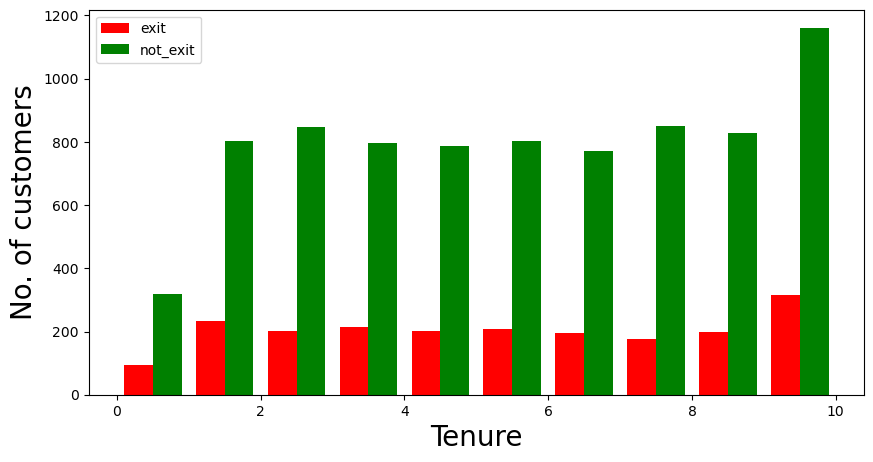

In [11]:
visualization(df_churn_exited,df_churn_not_exited,"Tenure")

In [12]:
df_churn_exited = df [df['Exited']==1]['Age']
df_churn_not_exited = df[df['Exited']==0]['Age']

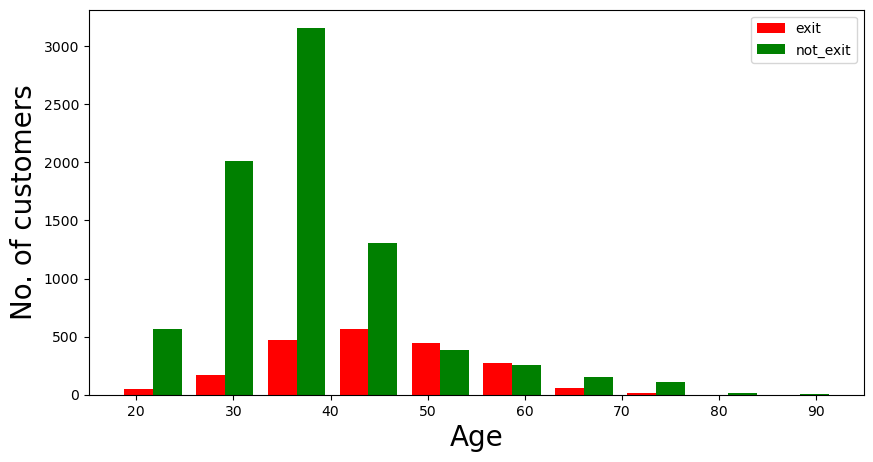

In [13]:
visualization(df_churn_exited,df_churn_not_exited,"Age")

In [14]:
df.dtypes

CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [16]:
x = df[['CreditScore','Gender','Age','Tenure','Balance', 'NumOfProducts','HasCrCard','IsActiveMember','EstimatedSalary','Exited']]
states = pd.get_dummies(df['Geography'],drop_first= True)
gender = pd.get_dummies(df['Gender'],drop_first= True)

In [17]:
df = pd.concat([df,gender,states], axis=1)

In [18]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Male,Germany,Spain
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,0,0,1
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,0,1


In [19]:
x = df[['CreditScore','Age','Tenure','Balance', 'NumOfProducts','HasCrCard','IsActiveMember','EstimatedSalary']]

In [20]:
y = df['Exited']

In [21]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=0, test_size=0.25)

In [22]:
x.shape

(10000, 8)

In [23]:
x_test.shape

(2500, 8)

In [24]:
x_train

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
2967,579,39,5,117833.30,3,0,0,5831.00
700,750,32,5,0.00,2,1,0,95611.47
3481,729,34,9,53299.96,2,1,1,42855.97
1621,689,38,5,75075.14,1,1,1,8651.92
800,605,52,7,0.00,2,1,1,173952.50
...,...,...,...,...,...,...,...,...
9225,594,32,4,120074.97,2,1,1,162961.79
4859,794,22,4,114440.24,1,1,1,107753.07
3264,738,35,5,161274.05,2,1,0,181429.87
9845,590,38,9,0.00,2,1,1,148750.16


In [25]:
x_test.shape

(2500, 8)

In [26]:
x_train.shape

(7500, 8)

In [27]:
from sklearn.neural_network import MLPClassifier

In [28]:
ann = MLPClassifier(hidden_layer_sizes=(100,100,100),
 random_state =0,
 max_iter=100, activation='relu')

In [30]:
ann.fit(x_train,y_train)

C:\Users\rushi\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(hidden_layer_sizes=(100, 100, 100), max_iter=100, random_state=0)

In [31]:
y_pred =ann.predict(x_test)

In [32]:
y_pred

array([1, 0, 0, ..., 0, 0, 0], dtype=int64)

In [33]:
import sklearn

In [34]:
from sklearn.metrics import ConfusionMatrixDisplay, classification_report
from sklearn.metrics import accuracy_score


In [35]:
y_test.value_counts()

0    1991
1     509
Name: Exited, dtype: int64

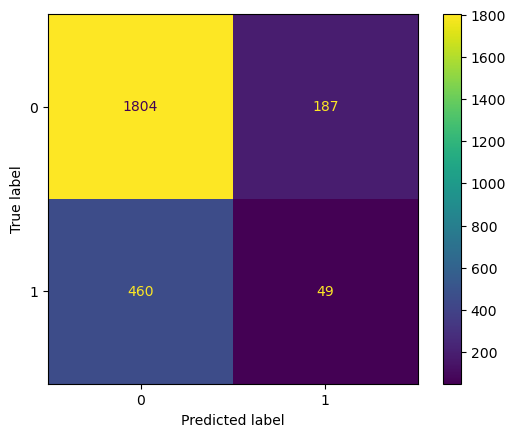

In [36]:
ConfusionMatrixDisplay.from_predictions(y_test,y_pred)

In [37]:
accuracy_score(y_test,y_pred)

0.7412

In [38]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.80      0.91      0.85      1991
           1       0.21      0.10      0.13       509

    accuracy                           0.74      2500
   macro avg       0.50      0.50      0.49      2500
weighted avg       0.68      0.74      0.70      2500

